In [1]:
import pandas as pd
import scipy.stats as stat 
import pingouin as pg # conda install -c condaforge  pingouin (윈도우에서는 관리자 권한 CMD에서)

import numpy as np
import seaborn as sns
import scikit_posthocs as sp # pip install scikit_posthocs
import pymodule.effectsize as es

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (4,4)

sns.set_style("darkgrid", { "axes.facecolor":"black",
                            "text.color":"black","axes.facecolor":"white",
                            "axes.edgecolor": ".5", "grid.color":".85", 'grid.linestyle': '--',
                            "xtick.color":"black", "ytick.color":"black", "axes.labelcolor":"black", "xtick.bottom":"true", "ytick.left":"true"})

def do(target_column):
    
    print('### Statistical Test Results on \'{}\' ###\n'.format(target_column))

    sns.boxplot(x="type", y="speed", data=sbj_data, palette="husl")
    plt.show()

    
    # (1) Check Homogeneity of Variance
    stats, pval = stat.levene(sbj_data[sbj_data['type']=='b']['speed'], 
            sbj_data[sbj_data['type']=='v']['speed'], 
            sbj_data[sbj_data['type']=='s']['speed'])
    print('(1) Levene Test for Equality of Variances')
    print('statistics : {}, p-value : {}'.format(stats, pval))

    # pvalue > 0.05 --> ANOVA 실행
    if pval < 0.05:
        return
    
    print()
    
    # (2) One-Way ANOVA
    aov = pg.anova(dv= target_column, between='type', data = sbj_data)

    print('(2) One-Way ANOVA')
    print('p-value : {}, effect size (partial eta-square) : {}'.format(aov['p-unc'].values[0], aov['np2'].values[0]))

    # Effect size 해석 시 참고 
    # http://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize
    # multivariate eta square (One Way ANOVA 용) --> small : 0.01, medium : 0.06, large : 0.14

    # pvalue < 0.05 --> Post_hoc test 실행
    if aov['p-unc'].values[0] >= 0.05:
        return

    print()
    # (3) Post-Hoc Test    
    print('(3) Post-Hoc Test')
    posthocs = pg.pairwise_ttests(dv=target_column, within='type', subject='user', data=sbj_data, padjust='bonf', effsize='cohen') # bonferroni correction, effect size for coehn d 
    pg.print_table(posthocs)
 

# Read Dataset

In [3]:
sbj_data = pd.read_csv('data/sbj_data.csv')
sbj_data.head()

,user,age,gender,type,read_char,corrected,time_sec,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,rank
0,1,20,f,b,17,6,35,5,6,5,4,2,4,3,7,2,3,1
1,1,20,f,v,9,5,67,1,6,5,3,7,6,2,7,5,6,2
2,1,20,f,s,3,1,52,3,6,2,1,1,1,6,3,6,4,3
3,2,21,m,b,7,0,29,4,5,5,1,2,4,1,2,3,2,1
4,2,21,m,v,16,2,71,4,6,2,6,4,1,6,3,3,5,2


In [4]:
sbj_data['speed'] = sbj_data['read_char']/sbj_data['time_sec']
sbj_data['precision'] = sbj_data['corrected']/sbj_data['read_char']
sbj_data['recall'] = sbj_data['read_char']/24

# SUS 채점 방식 https://m.blog.naver.com/PostView.nhn?blogId=car9380&logNo=50189788957

sbj_data['sus'] =( (sbj_data['q1']-1) + (sbj_data['q3']-1) + (sbj_data['q5']-1) + (sbj_data['q7']-1) + (sbj_data['q9'] - 1) +
                    abs(sbj_data['q2']-5) + abs(sbj_data['q4']-5) + abs(sbj_data['q6']-5) + abs(sbj_data['q8']-5) + abs(sbj_data['q10'] - 5)  ) * 2.5
    

# SPEED

### Statistical Test Results on 'speed' ###



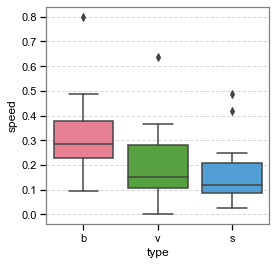

(1) Levene Test for Equality of Variances
statistics : 0.11832432109024751, p-value : 0.888820414115999

(2) One-Way ANOVA
p-value : 0.10468887310602534, effect size (partial eta-square) : 0.14


In [5]:
do('speed')

# PRECISION

### Statistical Test Results on 'precision' ###



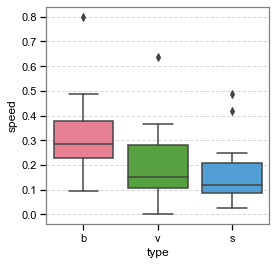

(1) Levene Test for Equality of Variances
statistics : 0.11832432109024751, p-value : 0.888820414115999

(2) One-Way ANOVA
p-value : 0.2304709366036292, effect size (partial eta-square) : 0.096


In [6]:
do('precision')

# RECALL

### Statistical Test Results on 'recall' ###



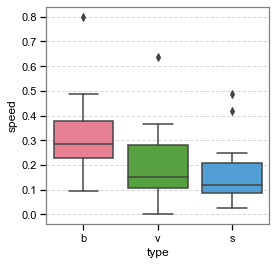

(1) Levene Test for Equality of Variances
statistics : 0.11832432109024751, p-value : 0.888820414115999

(2) One-Way ANOVA
p-value : 0.04686595460211421, effect size (partial eta-square) : 0.185

(3) Post-Hoc Test

POST HOC TESTS

Contrast    A    B    Paired    Parametric        T     dof  tail         p-unc    p-corr  p-adjust      BF10    CLES    cohen
----------  ---  ---  --------  ------------  -----  ------  ---------  -------  --------  ----------  ------  ------  -------
type        b    v    True      True          0.844  10.000  two-sided    0.419     1.000  bonf         0.401   0.603    0.412
type        b    s    True      True          3.504  10.000  two-sided    0.006     0.017  bonf         9.571   0.818    1.446
type        v    s    True      True          1.742  10.000  two-sided    0.112     0.336  bonf         0.939   0.628    0.631



In [7]:
do('recall')

# System Usability Scale

### Statistical Test Results on 'sus' ###



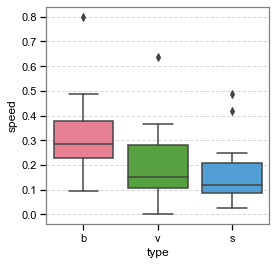

(1) Levene Test for Equality of Variances
statistics : 0.11832432109024751, p-value : 0.888820414115999

(2) One-Way ANOVA
p-value : 0.13956828432652885, effect size (partial eta-square) : 0.123


In [8]:
do('sus')